In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import Asso
import pandas as pd

### Generate Boolean matrix

[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.
(1000, 5)
(5, 500)
(1000, 500)


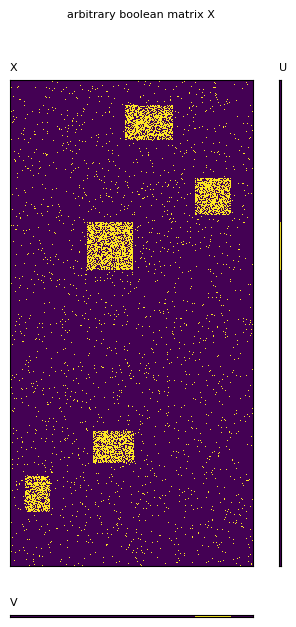

In [2]:
# generate arbitrary Boolean matrix (X)

from generators import DiagBooleanMatrix, ArbiBooleanMatrix

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = ArbiBooleanMatrix(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=1234) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

## II. Prediction task with Ratio Split

In [3]:
from datasets import RatioSplit

X_split = RatioSplit(X=X.X, test_size=0.2, val_size=0.2, seed=1997)
# negative sampling the same number of positive samples
X_split.negative_sample(train_size=X_split.pos_train_size, 
                        val_size=X_split.pos_val_size, 
                        test_size=X_split.pos_test_size, 
                        seed=2023, type='popularity')
X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 16877
[I]   val_size     : 5626
[I]   test_size    : 5626
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 471871
[I]   n_negatives  : 28129
[I]   train_size   : 16877
[I]   val_size     : 5626
[I]   test_size    : 5626
[I]   seed         : 2023


c:\Users\hongtuonie\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### 1. Manually select tau
k and w are not effective here.

In [4]:
# k = 5
# tau_list = [0.10, 0.20, 0.30]
# w = [0.8, 0.2]

# for tau in tau_list:
#     asso = Asso(k=k, tau=tau, w=w)
#     # plot assoc and basis
#     asso._fit_prepare(X_train, display=True)

### 2. Grid search for w
Use some small k and selected tau for trials.

In [5]:
k = 5
tau_list = [0.10]
w_list = [[0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]

# empty table
from utils import add_log

metrics = ['Recall', 'Precsion', 'Error', 'Accuracy', 'F1']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg'] + metrics
df_prediction = pd.DataFrame(columns=columns)
df_reconstruction = pd.DataFrame(columns=columns)

[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.4, 0.6]
[I] display      : False
[W] Missing validation data.
[I] display      : True


100%|██████████| 5/5 [00:22<00:00,  4.42s/it]


(1000, 500)
(1000, 5)
(5, 500)


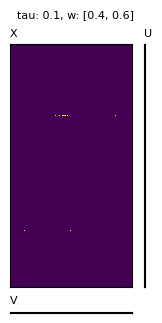

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:33:26.265836,5,0.1,0.4,0.6,0.001422,0.888889,0.499378,0.500622,0.002839


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:33:26.342196,5,0.1,0.4,0.6,0.001422,0.025806,0.01184,0.98816,0.002695


[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.5, 0.5]
[I] display      : False
[W] Missing validation data.
[I] display      : True


100%|██████████| 5/5 [00:17<00:00,  3.55s/it]

(1000, 500)
(1000, 5)
(5, 500)


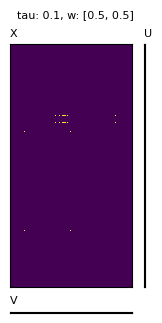

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:33:26.265836,5,0.1,0.4,0.6,0.001422,0.888889,0.499378,0.500622,0.002839
1,2023-12-06 22:33:46.380079,5,0.1,0.5,0.5,0.004799,0.771429,0.498311,0.501689,0.009539


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:33:26.342196,5,0.1,0.4,0.6,0.001422,0.025806,0.011840,0.988160,0.002695
1,2023-12-06 22:33:46.455417,5,0.1,0.5,0.5,0.004799,0.041925,0.012432,0.987568,0.008612


[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.6, 0.4]
[I] display      : False
[W] Missing validation data.
[I] display      : True


100%|██████████| 5/5 [00:18<00:00,  3.64s/it]

(1000, 500)
(1000, 5)
(5, 500)


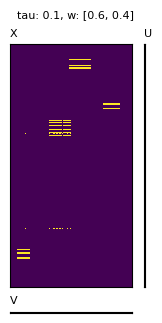

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:33:26.265836,5,0.1,0.4,0.6,0.001422,0.888889,0.499378,0.500622,0.002839
1,2023-12-06 22:33:46.380079,5,0.1,0.5,0.5,0.004799,0.771429,0.498311,0.501689,0.009539
2,2023-12-06 22:34:06.956788,5,0.1,0.6,0.4,0.120867,0.871795,0.448454,0.551546,0.212301


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:33:26.342196,5,0.1,0.4,0.6,0.001422,0.025806,0.011840,0.988160,0.002695
1,2023-12-06 22:33:46.455417,5,0.1,0.5,0.5,0.004799,0.041925,0.012432,0.987568,0.008612
2,2023-12-06 22:34:07.030008,5,0.1,0.6,0.4,0.120867,0.104407,0.021558,0.978442,0.112036


[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.7, 0.3]
[I] display      : False
[W] Missing validation data.
[I] display      : True


100%|██████████| 5/5 [00:20<00:00,  4.03s/it]

(1000, 500)
(1000, 5)
(5, 500)


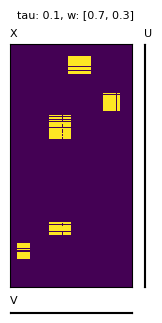

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:33:26.265836,5,0.1,0.4,0.6,0.001422,0.888889,0.499378,0.500622,0.002839
1,2023-12-06 22:33:46.380079,5,0.1,0.5,0.5,0.004799,0.771429,0.498311,0.501689,0.009539
2,2023-12-06 22:34:06.956788,5,0.1,0.6,0.4,0.120867,0.871795,0.448454,0.551546,0.212301
3,2023-12-06 22:34:29.483141,5,0.1,0.7,0.3,0.537682,0.863792,0.273551,0.726449,0.662796


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:33:26.342196,5,0.1,0.4,0.6,0.001422,0.025806,0.011840,0.988160,0.002695
1,2023-12-06 22:33:46.455417,5,0.1,0.5,0.5,0.004799,0.041925,0.012432,0.987568,0.008612
2,2023-12-06 22:34:07.030008,5,0.1,0.6,0.4,0.120867,0.104407,0.021558,0.978442,0.112036
3,2023-12-06 22:34:29.558245,5,0.1,0.7,0.3,0.537682,0.115643,0.051468,0.948532,0.190347


[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.8, 0.2]
[I] display      : False
[W] Missing validation data.
[I] display      : True


100%|██████████| 5/5 [00:22<00:00,  4.45s/it]

(1000, 500)
(1000, 5)
(5, 500)


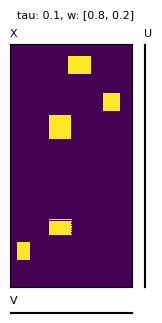

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:33:26.265836,5,0.1,0.4,0.6,0.001422,0.888889,0.499378,0.500622,0.002839
1,2023-12-06 22:33:46.380079,5,0.1,0.5,0.5,0.004799,0.771429,0.498311,0.501689,0.009539
2,2023-12-06 22:34:06.956788,5,0.1,0.6,0.4,0.120867,0.871795,0.448454,0.551546,0.212301
3,2023-12-06 22:34:29.483141,5,0.1,0.7,0.3,0.537682,0.863792,0.273551,0.726449,0.662796
4,2023-12-06 22:34:54.176116,5,0.1,0.8,0.2,0.667970,0.866897,0.217295,0.782705,0.754543


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:33:26.342196,5,0.1,0.4,0.6,0.001422,0.025806,0.011840,0.988160,0.002695
1,2023-12-06 22:33:46.455417,5,0.1,0.5,0.5,0.004799,0.041925,0.012432,0.987568,0.008612
2,2023-12-06 22:34:07.030008,5,0.1,0.6,0.4,0.120867,0.104407,0.021558,0.978442,0.112036
3,2023-12-06 22:34:29.558245,5,0.1,0.7,0.3,0.537682,0.115643,0.051468,0.948532,0.190347
4,2023-12-06 22:34:54.258769,5,0.1,0.8,0.2,0.667970,0.118132,0.059844,0.940156,0.200759


[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.9, 0.1]
[I] display      : False
[W] Missing validation data.
[I] display      : True


100%|██████████| 5/5 [00:27<00:00,  5.47s/it]

(1000, 500)
(1000, 5)
(5, 500)


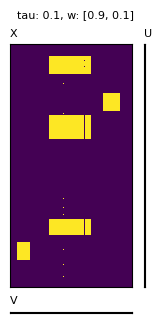

,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
1,2023-12-06 22:33:46.380079,5,0.1,0.5,0.5,0.004799,0.771429,0.498311,0.501689,0.009539
2,2023-12-06 22:34:06.956788,5,0.1,0.6,0.4,0.120867,0.871795,0.448454,0.551546,0.212301
3,2023-12-06 22:34:29.483141,5,0.1,0.7,0.3,0.537682,0.863792,0.273551,0.726449,0.662796
4,2023-12-06 22:34:54.176116,5,0.1,0.8,0.2,0.667970,0.866897,0.217295,0.782705,0.754543
5,2023-12-06 22:35:24.092880,5,0.1,0.9,0.1,0.681123,0.754776,0.270085,0.729915,0.716061


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
1,2023-12-06 22:33:46.455417,5,0.1,0.5,0.5,0.004799,0.041925,0.012432,0.987568,0.008612
2,2023-12-06 22:34:07.030008,5,0.1,0.6,0.4,0.120867,0.104407,0.021558,0.978442,0.112036
3,2023-12-06 22:34:29.558245,5,0.1,0.7,0.3,0.537682,0.115643,0.051468,0.948532,0.190347
4,2023-12-06 22:34:54.258769,5,0.1,0.8,0.2,0.667970,0.118132,0.059844,0.940156,0.200759
5,2023-12-06 22:35:24.167722,5,0.1,0.9,0.1,0.681123,0.077598,0.094690,0.905310,0.139323


In [6]:
for tau in tau_list:
    for w in w_list:
        asso = Asso(k=k, tau=tau, w=w)
        asso.fit(X_train, display=True)

        results = asso.eval(X_test, metrics=metrics, task='prediction')
        add_log(df_prediction, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)

        # to see the difference of 'prediction' and 'reconstruction'
        # 'reconstruction' takes all 0's as negative samples
        results = asso.eval(X_test, metrics=metrics, task='reconstruction')
        add_log(df_reconstruction, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results)

### 3. Get k
Given tau and w.

In [7]:
k = 10 # more than ground truth
tau_list = [0.10]
w_list = [[0.4, 0.6], [0.5, 0.5], [0.6, 0.4]]

for tau in tau_list:
    for w in w_list:
        asso = Asso(k=k, tau=tau, w=w)
        asso.fit(X_train, X_val, display=False) # load X_val to activate per-step eval

        display(asso.df_eval)

[I] k            : 10
[I] tau          : 0.1
[I] weights      : [0.4, 0.6]
[I] display      : False
[I] display      : False


  0%|          | 0/10 [00:00<?, ?it/s]d:\Dropbox\PyBMF\examples\..\utils\evaluate_utils.py:73: RuntimeWarning: invalid value encountered in divide
  return TP(gt, pd, axis=axis) / pd.sum(axis=axis)
100%|██████████| 10/10 [00:59<00:00,  5.99s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:35:30.981009,1,0.1,0.4,0.6,0.000000,NaN,0.500000,0.500000,NaN
1,2023-12-06 22:35:37.122274,2,0.1,0.4,0.6,0.000711,0.800000,0.499733,0.500267,0.001421
2,2023-12-06 22:35:43.323322,3,0.1,0.4,0.6,0.000711,0.800000,0.499733,0.500267,0.001421
3,2023-12-06 22:35:49.257283,4,0.1,0.4,0.6,0.001244,0.777778,0.499556,0.500444,0.002484
4,2023-12-06 22:35:55.217067,5,0.1,0.4,0.6,0.001955,0.785714,0.499289,0.500711,0.003901
5,2023-12-06 22:36:01.066582,6,0.1,0.4,0.6,0.002133,0.800000,0.499200,0.500800,0.004255
6,2023-12-06 22:36:07.175698,7,0.1,0.4,0.6,0.002488,0.823529,0.499022,0.500978,0.004962
7,2023-12-06 22:36:12.945551,8,0.1,0.4,0.6,0.002666,0.833333,0.498934,0.501066,0.005315
8,2023-12-06 22:36:18.596046,9,0.1,0.4,0.6,0.002844,0.842105,0.498845,0.501155,0.005669
9,2023-12-06 22:36:24.512185,10,0.1,0.4,0.6,0.002844,0.800000,0.498934,0.501066,0.005668


[I] k            : 10
[I] tau          : 0.1
[I] weights      : [0.5, 0.5]
[I] display      : False
[I] display      : False


100%|██████████| 10/10 [01:00<00:00,  6.04s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:36:30.579283,1,0.1,0.5,0.5,0.001244,0.636364,0.499733,0.500267,0.002484
1,2023-12-06 22:36:36.556344,2,0.1,0.5,0.5,0.002666,0.714286,0.499200,0.500800,0.005313
2,2023-12-06 22:36:42.384206,3,0.1,0.5,0.5,0.004266,0.774194,0.498489,0.501511,0.008485
3,2023-12-06 22:36:48.548777,4,0.1,0.5,0.5,0.004444,0.781250,0.498400,0.501600,0.008837
4,2023-12-06 22:36:54.673072,5,0.1,0.5,0.5,0.005866,0.767442,0.497956,0.502044,0.011642
5,2023-12-06 22:37:00.828260,6,0.1,0.5,0.5,0.006221,0.777778,0.497778,0.502222,0.012344
6,2023-12-06 22:37:06.908059,7,0.1,0.5,0.5,0.006754,0.760000,0.497689,0.502311,0.013390
7,2023-12-06 22:37:13.018864,8,0.1,0.5,0.5,0.007465,0.763636,0.497423,0.502577,0.014786
8,2023-12-06 22:37:19.121380,9,0.1,0.5,0.5,0.007821,0.771930,0.497245,0.502755,0.015485
9,2023-12-06 22:37:25.185099,10,0.1,0.5,0.5,0.010487,0.786667,0.496178,0.503822,0.020698


[I] k            : 10
[I] tau          : 0.1
[I] weights      : [0.6, 0.4]
[I] display      : False
[I] display      : False


100%|██████████| 10/10 [01:04<00:00,  6.41s/it]


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1
0,2023-12-06 22:37:31.239338,1,0.1,0.6,0.4,0.053502,0.872464,0.477160,0.522840,0.100821
1,2023-12-06 22:37:37.292470,2,0.1,0.6,0.4,0.072876,0.874200,0.468806,0.531194,0.134537
2,2023-12-06 22:37:43.782645,3,0.1,0.6,0.4,0.098827,0.881141,0.457252,0.542748,0.177721
3,2023-12-06 22:37:50.133299,4,0.1,0.6,0.4,0.118557,0.879947,0.448809,0.551191,0.208960
4,2023-12-06 22:37:56.783257,5,0.1,0.6,0.4,0.124956,0.877653,0.446232,0.553768,0.218765
5,2023-12-06 22:38:03.825977,6,0.1,0.6,0.4,0.126200,0.873309,0.446054,0.553946,0.220531
6,2023-12-06 22:38:10.319709,7,0.1,0.6,0.4,0.134021,0.867664,0.443210,0.556790,0.232179
7,2023-12-06 22:38:16.714677,8,0.1,0.6,0.4,0.134554,0.868119,0.442943,0.557057,0.232995
8,2023-12-06 22:38:23.076328,9,0.1,0.6,0.4,0.137931,0.866071,0.441699,0.558301,0.237964
9,2023-12-06 22:38:29.509925,10,0.1,0.6,0.4,0.141664,0.866304,0.440100,0.559900,0.243507
